# 1. IMPORT LIBRARY & DATA

In [2]:
# ==============================
#IMPORT DATA PROCESS
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno
from datetime import datetime
from sklearn.preprocessing import LabelEncoder


# Load dataset
df = pd.read_csv('/content/Ecommerce_Consumer_Behavior_Analysis_Data.csv')
df.head()

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
0,37-611-6911,22,Female,Middle,Married,Bachelor's,Middle,Évry,Gardening & Outdoors,$333.80,...,7,NaN,Tablet,Credit Card,3/1/2024,True,False,Need-based,No Preference,2
1,29-392-9296,49,Male,High,Married,High School,High,Huocheng,Food & Beverages,$222.22,...,5,High,Tablet,PayPal,4/16/2024,True,False,Wants-based,Standard,6
2,84-649-5117,24,Female,Middle,Single,Master's,High,Huzhen,Office Supplies,$426.22,...,7,Low,Smartphone,Debit Card,3/15/2024,True,True,Impulsive,No Preference,3
3,48-980-6078,29,Female,Middle,Single,Master's,Middle,Wiwilí,Home Appliances,$101.31,...,1,NaN,Smartphone,Other,10/4/2024,True,True,Need-based,Express,10
4,91-170-9072,33,Female,Middle,Widowed,High School,Middle,Nara,Furniture,$211.70,...,10,NaN,Smartphone,Debit Card,1/30/2024,False,False,Wants-based,No Preference,4


# Data Understanding

This stage is used to understand the overall structure of the dataset, such as data types, category distribution, and minimum-maximum values ​​in numeric columns. This is important for detecting early anomalies, such as outliers or irrelevant categories.

In [3]:
# Struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Customer_ID                            1000 non-null   object 
 1   Age                                    1000 non-null   int64  
 2   Gender                                 1000 non-null   object 
 3   Income_Level                           1000 non-null   object 
 4   Marital_Status                         1000 non-null   object 
 5   Education_Level                        1000 non-null   object 
 6   Occupation                             1000 non-null   object 
 7   Location                               1000 non-null   object 
 8   Purchase_Category                      1000 non-null   object 
 9   Purchase_Amount                        1000 non-null   object 
 10  Frequency_of_Purchase                  1000 non-null   int64  
 11  Purch

In [4]:
# Summary statistics
df.describe(include='all')

,Customer_ID,Age,Gender,Income_Level,Marital_Status,Education_Level,Occupation,Location,Purchase_Category,Purchase_Amount,...,Customer_Satisfaction,Engagement_with_Ads,Device_Used_for_Shopping,Payment_Method,Time_of_Purchase,Discount_Used,Customer_Loyalty_Program_Member,Purchase_Intent,Shipping_Preference,Time_to_Decision
count,1000,1000.000000,1000,1000,1000,1000,1000,1000,1000,1000,...,1000.000000,744,1000,1000,1000,1000,1000,1000,1000,1000.000000
unique,1000,NaN,8,2,4,3,2,969,24,989,...,NaN,3,3,5,344,2,2,4,3,NaN
top,48-203-9118,NaN,Female,High,Widowed,Bachelor's,High,Oslo,Electronics,$178.04,...,NaN,High,Desktop,PayPal,3/3/2024,True,False,Need-based,No Preference,NaN
freq,1,NaN,452,515,260,341,517,4,54,2,...,NaN,270,350,219,8,521,509,256,372,NaN
mean,NaN,34.304000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.399000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.547000
std,NaN,9.353238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.868454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.035849
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
50%,NaN,34.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,42.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [5]:
# Initial distribution of some categorical features
for col in ['Gender', 'Income_Level', 'Marital_Status', 'Purchase_Channel', 'Customer_Loyalty_Program_Member']:
    print(f"\nDistribusi kategori kolom: {col}")
    print(df[col].value_counts(normalize=True) * 100)


Distribusi kategori kolom: Gender
Gender
Female         45.2
Male           44.9
Bigender        2.0
Agender         1.9
Genderfluid     1.7
Non-binary      1.6
Polygender      1.5
Genderqueer     1.2
Name: proportion, dtype: float64

Distribusi kategori kolom: Income_Level
Income_Level
High      51.5
Middle    48.5
Name: proportion, dtype: float64

Distribusi kategori kolom: Marital_Status
Marital_Status
Widowed     26.0
Married     25.3
Divorced    24.5
Single      24.2
Name: proportion, dtype: float64

Distribusi kategori kolom: Purchase_Channel
Purchase_Channel
Mixed       34.0
Online      33.4
In-Store    32.6
Name: proportion, dtype: float64

Distribusi kategori kolom: Customer_Loyalty_Program_Member
Customer_Loyalty_Program_Member
False    50.9
True     49.1
Name: proportion, dtype: float64


#Cleaning Data

Data cleaning ensures that data types are correct, missing values ​​are handled, and text formats such as dollars or dates are changed so that Python can process them numerically and analytically.

In [6]:
# Ubah kolom nominal
df['Purchase_Amount'] = df['Purchase_Amount'].replace('[\$,]', '', regex=True).astype(float)

df['Purchase_Amount'].head()

,Purchase_Amount
0,333.80
1,222.22
2,426.22
3,101.31
4,211.70


In [7]:
# Convert time to datetime
df['Time_of_Purchase'] = pd.to_datetime(df['Time_of_Purchase'])

df['Time_of_Purchase'].head()

,Time_of_Purchase
0,2024-03-01
1,2024-04-16
2,2024-03-15
3,2024-10-04
4,2024-01-30


In [8]:
# Replace None with NaN
df.replace('None', np.nan, inplace=True)

In [9]:
# Drop rows
df.dropna(subset=['Purchase_Amount', 'Brand_Loyalty', 'Product_Rating'], inplace=True)

In [10]:
# Check missing values
print(df.isnull().sum())

Customer_ID                                0
Age                                        0
Gender                                     0
Income_Level                               0
Marital_Status                             0
Education_Level                            0
Occupation                                 0
Location                                   0
Purchase_Category                          0
Purchase_Amount                            0
Frequency_of_Purchase                      0
Purchase_Channel                           0
Brand_Loyalty                              0
Product_Rating                             0
Time_Spent_on_Product_Research(hours)      0
Social_Media_Influence                   247
Discount_Sensitivity                       0
Return_Rate                                0
Customer_Satisfaction                      0
Engagement_with_Ads                      256
Device_Used_for_Shopping                   0
Payment_Method                             0
Time_of_Pu

In [11]:
# Handling
df['Social_Media_Influence'] = df['Social_Media_Influence'].fillna(df['Social_Media_Influence'].mode()[0])
df['Engagement_with_Ads'] = df['Engagement_with_Ads'].fillna(df['Engagement_with_Ads'].mode()[0])

In [12]:
df.isnull().sum()

,0
Customer_ID,0
Age,0
Gender,0
Income_Level,0
Marital_Status,0
Education_Level,0
Occupation,0
Location,0
Purchase_Category,0
Purchase_Amount,0


In [13]:
# Standardize gender
df['Gender'] = df['Gender'].apply(lambda x: x if x in ['Female', 'Male'] else 'Prefer not to say')

df['Gender'].head()

,Gender
0,Female
1,Male
2,Female
3,Female
4,Female


# 3. FEATURE ENGINEERING

Several important transformations were performed:

Extracting Month_of_Purchase from date

Encoding categorical variables (Gender, Income_Level, Purchase_Channel, etc.)

In [14]:
# New time-based columns
df['Month_of_Purchase'] = df['Time_of_Purchase'].dt.month
df['Day_of_Week'] = df['Time_of_Purchase'].dt.day_name()
df['Is_Weekend'] = df['Day_of_Week'].isin(['Saturday', 'Sunday'])

print(df[['Time_of_Purchase', 'Month_of_Purchase', 'Day_of_Week', 'Is_Weekend']].head())

  Time_of_Purchase  Month_of_Purchase Day_of_Week  Is_Weekend
0       2024-03-01                  3      Friday       False
1       2024-04-16                  4     Tuesday       False
2       2024-03-15                  3      Friday       False
3       2024-10-04                 10      Friday       False
4       2024-01-30                  1     Tuesday       False


In [15]:
# Extract month and hour from purchase time
df['Purchase_Month'] = df['Time_of_Purchase'].dt.month
df['Purchase_Hour'] = df['Time_of_Purchase'].dt.hour

# **EDA **
Only selected visualizations will be included in the presentation. The remaining visualizations serve as supporting materials for more in-depth analysis.

# I) CUSTOMER DEMOGRAPHICS & PROFILE


#1. Age Distribution

The goal of this visualization is to understand the age distribution of customers. This helps identify which age groups are most represented and supports targeted marketing or segmentation efforts.


/tmp/ipython-input-16-3893869943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age_Group', palette='pastel')


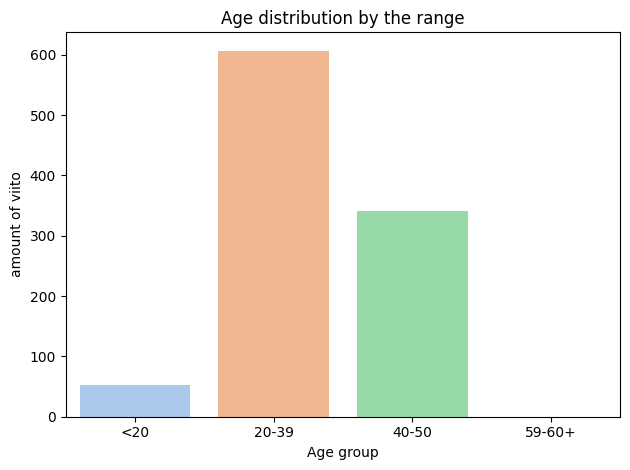

In [16]:
bins = [0, 19, 39, 59, 100] #membagi nilai ke rentang group dibawah
labels = ['<20', '20-39', '40-50', '59-60+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

sns.countplot(data=df, x='Age_Group', palette='pastel')
plt.title("Age distribution by the range")
plt.xlabel("Age group")
plt.ylabel("amount of viito")
plt.tight_layout()
plt.show()

The chart shows that customer ages range from around 18 to 50 years old, with a relatively even spread. There are slight **peaks in the mid-20s, mid-30s, and mid-40s**, indicating clusters of customers in those age ranges.

 # 2.Gender vs Purchasing

The purpose of this chart is to explore whether there are noticeable differences in purchase behavior based on gender. Specifically, it aims to see if any gender group tends to make higher-value purchases than others.

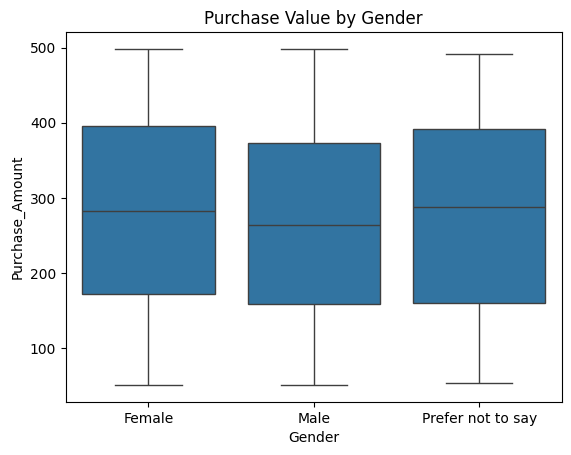

In [17]:
sns.boxplot(data=df, x='Gender', y='Purchase_Amount')
plt.title("Purchase Value by Gender")
plt.show()

From the boxplot, all gender groups show similar purchase value ranges and medians, indicating no significant difference in purchase behavior between males, females, and those who prefer not to say. This suggests that **gender may not be a strong factor influencing purchase amounts** in this dataset.

#3. Income vs Loyality

To examine whether customers with higher income levels tend to show greater loyalty to a brand. This helps identify which income segment is more suitable for loyalty program targeting marketing.

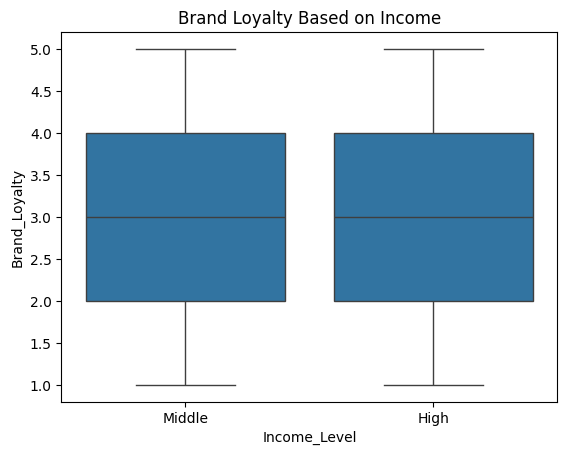

In [18]:
sns.boxplot(data=df, x='Income_Level', y='Brand_Loyalty')
plt.title("Brand Loyalty Based on Income")
plt.show()

The boxplot shows that both middle- and high-income groups have a similar spread and median of brand loyalty. There’s no clear distinction between the two groups, indicating that **income level may not be a strong predictor of brand loyalty** in this dataset. Loyalty appears to be distributed evenly regardless of income.

#4. Segmentation

To understand how customers are distributed across different value-based segments (Low, Medium, High, Very High) in order to support strategic marketing and prioritization

count    1000.000000
mean      275.063880
std       131.532998
min        50.710000
25%       162.235000
50%       276.165000
75%       388.982500
max       498.330000
Name: Purchase_Amount, dtype: float64


/tmp/ipython-input-19-3147186079.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df.drop_duplicates(subset='Customer_ID'), x='Segment', palette='pastel')


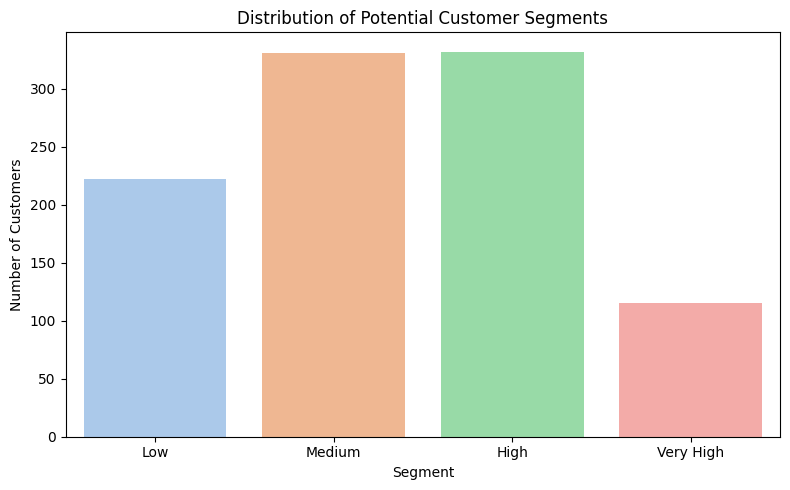

In [19]:
#EDA HO GROUPBY CEK YAA

customer_spending = df.groupby('Customer_ID')['Purchase_Amount'].sum().reset_index()


print(customer_spending['Purchase_Amount'].describe())


bins = [0, 150, 300, 450, customer_spending['Purchase_Amount'].max() + 1]
labels = ['Low', 'Medium', 'High', 'Very High']


customer_spending['Segment'] = pd.cut(customer_spending['Purchase_Amount'],
                                      bins=bins,
                                      labels=labels,
                                      include_lowest=True)

if 'Segment' in df.columns:
    df = df.drop(columns=['Segment'])

df = df.merge(customer_spending[['Customer_ID', 'Segment']], on='Customer_ID', how='left')

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df.drop_duplicates(subset='Customer_ID'), x='Segment', palette='pastel')
plt.title('Distribution of Potential Customer Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Most customers fall into the **High and Medium segments, indicating they contribute significantly to overall business value.
The Very High segment is the smallest, but likely represents the most profitable customers**.

#II) PURCHASING BEHAVIOR & TRENDS

# f. Number of Purchases Per Day

To identify which days of the week customers are most active in making purchases, helping businesses optimize promotional timing.

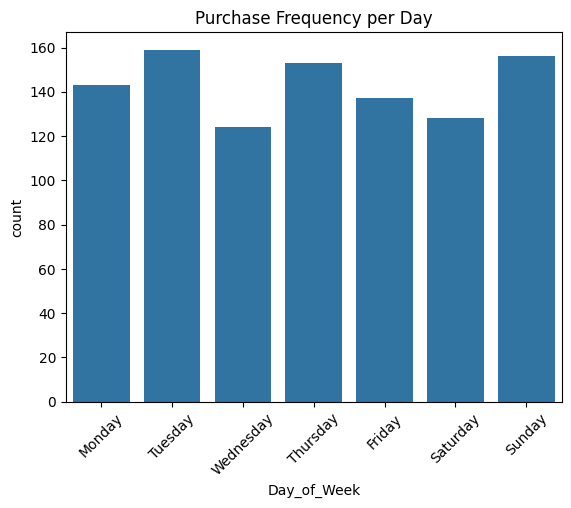

In [20]:
sns.countplot(data=df, x='Day_of_Week', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Purchase Frequency per Day")
plt.xticks(rotation=45)
plt.show()

Purchases **peak on Tuesday, Sunday, and Thursday, while Wednesday and Saturday see the lowest activity**. This suggests that **promotions or campaigns may be most effective when scheduled for early and end-of-week** periods, particularly Tuesday and Sunday.

#Monthly Trends

To analyze monthly purchasing trends and identify periods of peak customer activity, enabling more effective planning for marketing or inventory.

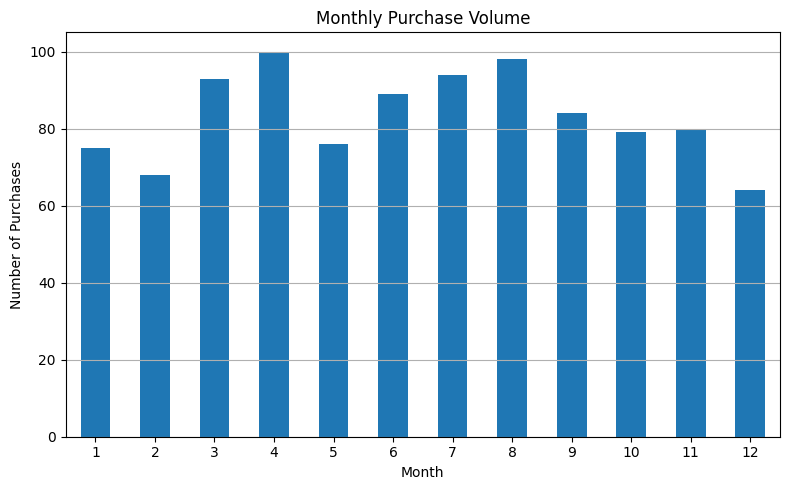

 Highest purchase activity occurred in: 4


In [21]:
# Trend of purchases by month
df['Purchase_Month'] = df['Time_of_Purchase'].dt.month
monthly_sales = df['Purchase_Month'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
monthly_sales.plot(kind='bar')
plt.title('Monthly Purchase Volume')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


print(" Highest purchase activity occurred in:", monthly_sales.idxmax())

**The highest purchase activity occurred in Month 6**, followed closely by Months 5 and 8. Meanwhile, **Month 12 recorded the lowest purchase volume**.

#Purchases monthly per channel

To compare monthly purchase trends across different channels InStore, Online, and Mixed, in order to understand customer preferences and optimize channel specific strategies.

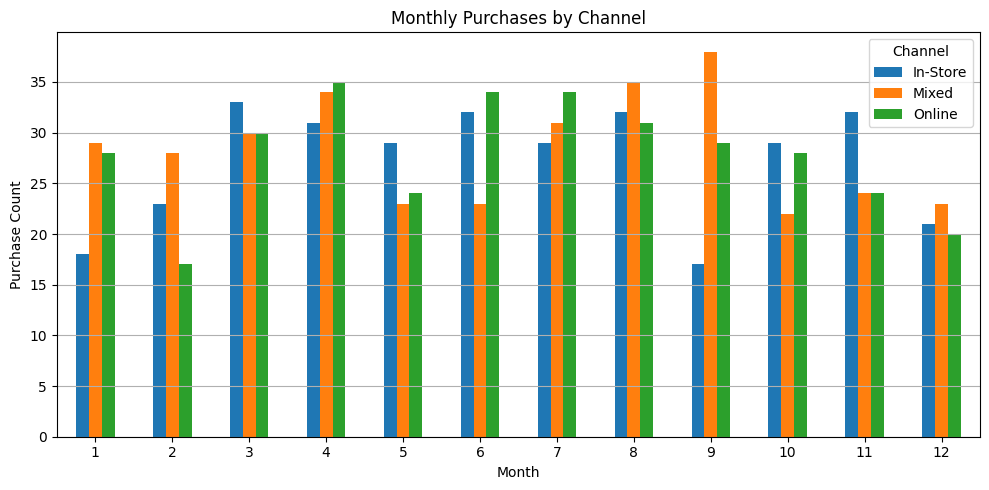

In [22]:
monthly_by_channel = df.groupby(['Purchase_Month', 'Purchase_Channel']).size().unstack()
monthly_by_channel.plot(kind='bar', figsize=(10, 5))
plt.title('Monthly Purchases by Channel')
plt.xlabel('Month')
plt.ylabel('Purchase Count')
plt.legend(title='Channel')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [23]:
df['Purchase_Channel'].value_counts()

,count
Purchase_Channel,
Mixed,340
Online,334
In-Store,326


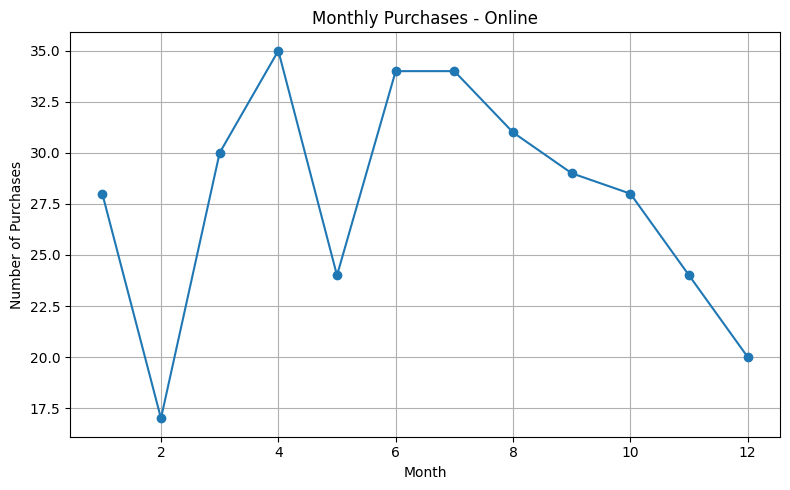

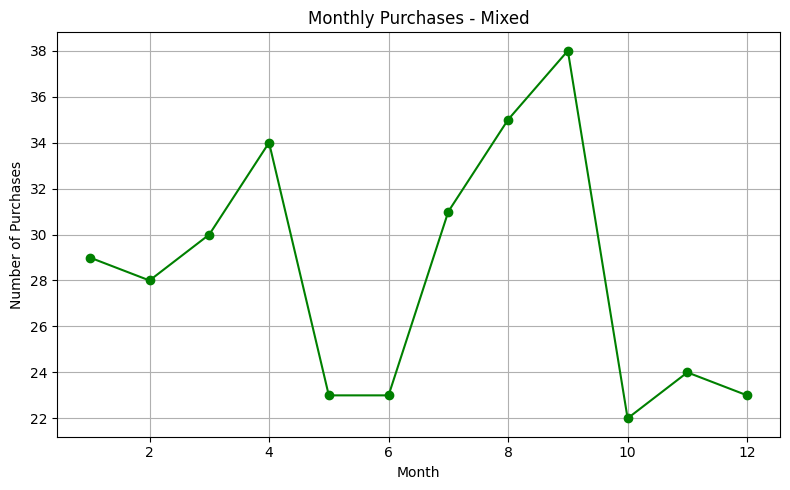

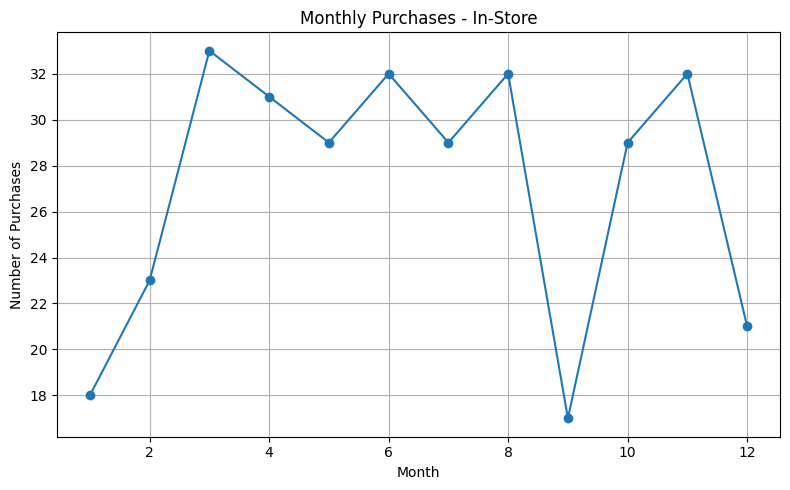

In [24]:
#Online purchase trends
online_data = df[df['Purchase_Channel'] == 'Online']
monthly_online = online_data.groupby('Purchase_Month').size()

plt.figure(figsize=(8, 5))
monthly_online.plot(kind='line', marker='o')
plt.title('Monthly Purchases - Online')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()

#Mix purchase trends
mixed_data = df[df['Purchase_Channel'] == 'Mixed']
monthly_mixed = mixed_data.groupby('Purchase_Month').size()

plt.figure(figsize=(8, 5))
monthly_mixed.plot(kind='line', marker='o', color='green')
plt.title('Monthly Purchases - Mixed')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()

#Instore purchse
instore_data = df[df['Purchase_Channel'] == 'In-Store']
instore_monthly = instore_data['Purchase_Month'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
instore_monthly.plot(kind='line', marker='o')
plt.title('Monthly Purchases - In-Store')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.grid(True)
plt.tight_layout()
plt.show()

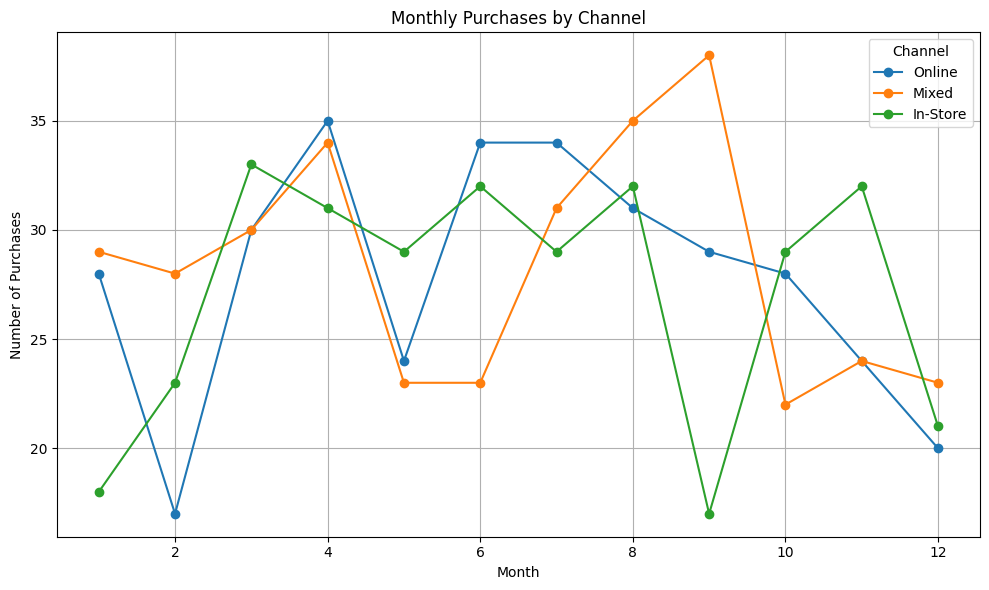

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_by_channel['Online'], marker='o', label='Online')
plt.plot(monthly_by_channel['Mixed'], marker='o', label='Mixed')
plt.plot(monthly_by_channel['In-Store'], marker='o', label='In-Store')

plt.title('Monthly Purchases by Channel')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.legend(title='Channel')
plt.grid(True)
plt.tight_layout()
plt.show()

Across most months, the **Mixed channel consistently shows high activity, peaking in Month 9**, followed by Online and In-Store. Online purchases are relatively steady but tend to dip in months like 2 and 12. This suggests that **customers increasingly use multiple channels** to complete their purchases, highlighting the importance of a strong **omnichannel strategy**.

#b. Total Purchases per Channel

To evaluate the total number of purchases and total sales value across different channels, providing insights into which sales channels are most effective

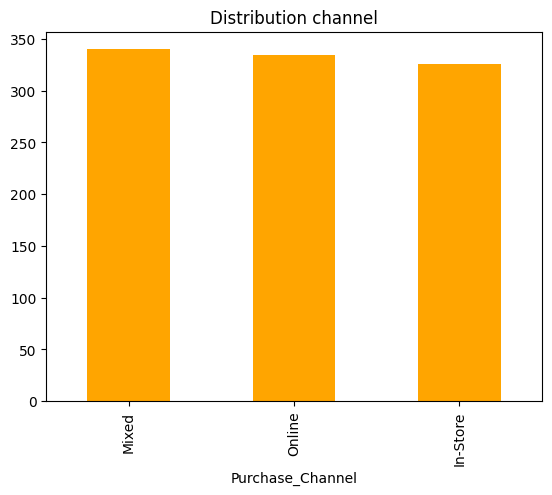

In [26]:
df['Purchase_Channel'].value_counts().plot(kind='bar', color='orange')
plt.title("Distribution channel")
plt.show()

channel_sales = df.groupby('Purchase_Channel')['Purchase_Amount'].sum().reset_index()
px.bar(channel_sales, x='Purchase_Channel', y='Purchase_Amount', title='Total sales perchannel')

# Product Favorites

The goal of this analysis is to identify which product categories perform best in terms of customer loyalty and return rate. This helps determine where customer satisfaction and retention are strongest

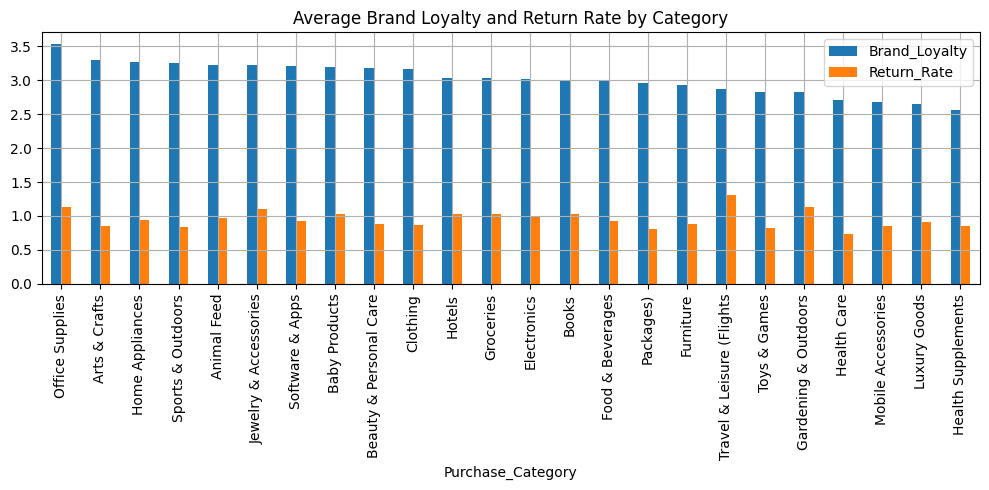

Most loyal category: Office Supplies
Category with lowest return rate: Health Care


In [27]:
category_stats = df.groupby('Purchase_Category')[['Brand_Loyalty', 'Return_Rate']].mean().sort_values('Brand_Loyalty', ascending=False)
category_stats.plot(kind='bar', figsize=(10,5))
plt.title('Average Brand Loyalty and Return Rate by Category')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Most loyal category:", category_stats.index[0])
print("Category with lowest return rate:", category_stats['Return_Rate'].idxmin())

The insight reveals that **Office Supplies has the highest brand loyalty**, while **Health Care has the lowest return** rate both indicating strong customer trust and minimal dissatisfaction in these categories.

Region with the higest profit:
      Location  Purchase_Amount
0     Göteborg          1161.29
1         Oslo          1021.55
2  Punta Gorda           820.45
3    Magdalena           804.74
4        Hoolt           780.60


/tmp/ipython-input-28-2599871952.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




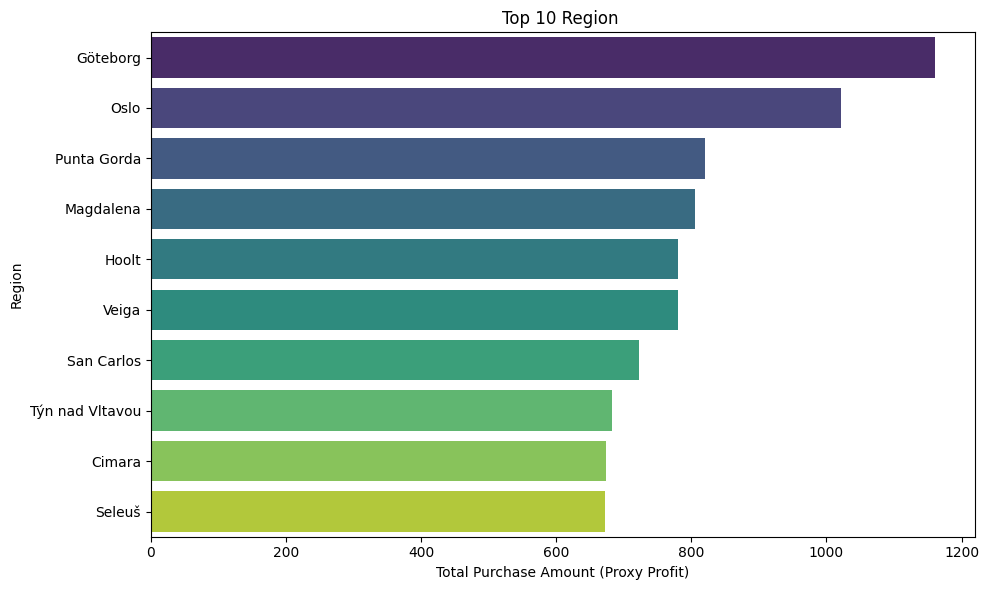

In [28]:
# (profit) per region
region_profit = df.groupby('Location')['Purchase_Amount'].sum().sort_values(ascending=False).reset_index()

print("Region with the higest profit:")
print(region_profit.head())


plt.figure(figsize=(10,6))
sns.barplot(data=region_profit.head(10), x='Purchase_Amount', y='Location', palette='viridis')
plt.title('Top 10 Region ')
plt.xlabel('Total Purchase Amount (Proxy Profit)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

**Goteborg and Oslo are the top performing regions in terms of total purchase value**, indicating strong customer engagement and revenue potential.

#Product Loyalty or Return Rate

The goal of this analysis is to identify which product categories drive the most frequent repeat purchases, helping to prioritize areas for loyalty programs or bundling strategies.

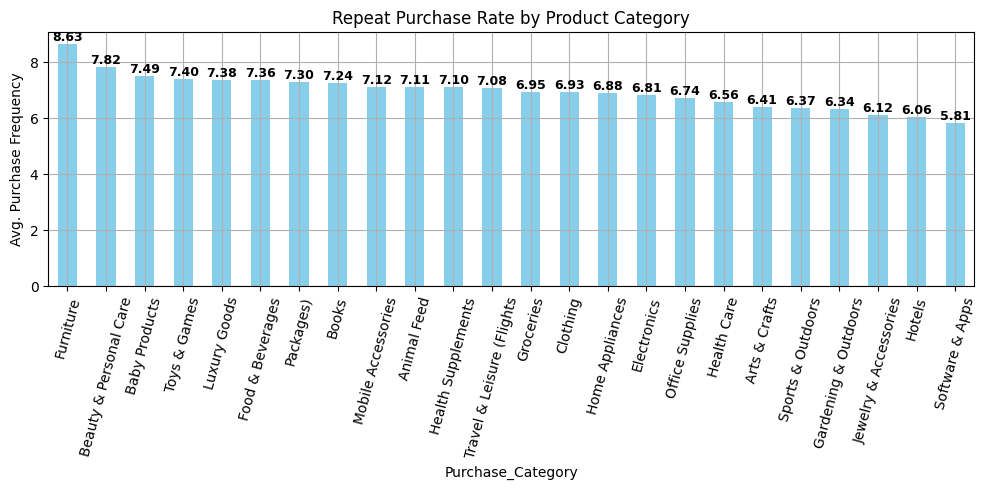

Top category for repeat purchases: Furniture


In [29]:
repeat_purchase = df.groupby('Purchase_Category')['Frequency_of_Purchase'].mean().sort_values(ascending=False)
ax = repeat_purchase.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title('Repeat Purchase Rate by Product Category')
plt.ylabel('Avg. Purchase Frequency')
plt.xticks(rotation=75)
plt.grid(True)

# Label bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("Top category for repeat purchases:", repeat_purchase.idxmax())

The analysis shows that **Furniture leads in repeat purchases**, making it ideal for loyalty or bundling campaigns. **Other high-frequency categories like Beauty & Personal Care, Baby Products, and Toys & Games suggest strong customer habits**, suitable for auto-replenishment or subscription models. Mid-tier categories such as Books and Food & Beverages can benefit from seasonal promotions. Meanwhile, Jewelry & Accessories and Hotels have lower repeat rates,

#III)BEHAVIORSL PSYCHOLOGY

#Impulsive vs Planned Buyers

Buyer_Type
Planned      914
Impulsive     86
Name: count, dtype: int64


/tmp/ipython-input-30-1040632017.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




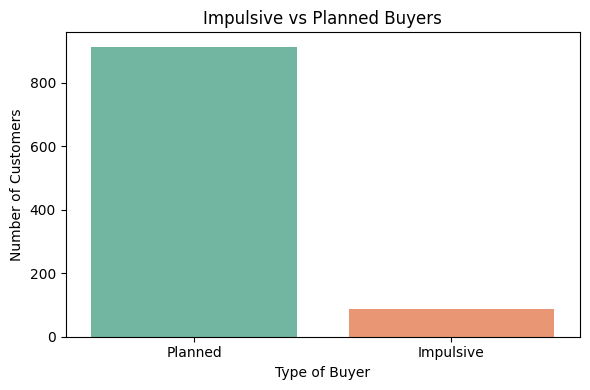

In [30]:
df['Buyer_Type'] = df['Time_to_Decision'].apply(lambda x: 'Impulsive' if x <= 1 else 'Planned')


buyer_counts = df['Buyer_Type'].value_counts()
print(buyer_counts)

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Buyer_Type', palette='Set2')
plt.title('Impulsive vs Planned Buyers')
plt.xlabel('Type of Buyer')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Most customers tend to plan their purchases ahead of time, with only a small segment making impulsive buys. This suggests that marketing efforts should focus on nurturing these planned buyers, while also exploring strategies to encourage more spontaneous purchases. Balancing both approaches can help maximize overall sales.










#Average time to taken in purchasing


The goal is to understand how long customers take to make purchase decisions, helping to distinguish between impulsive and planned buyers

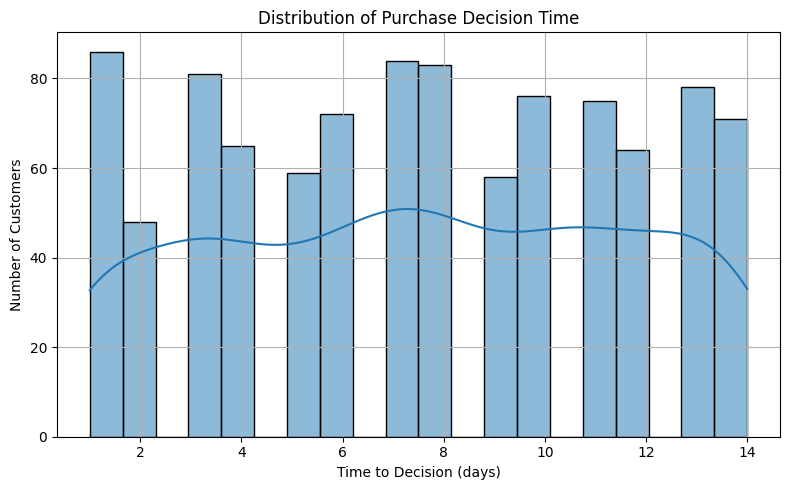

Avg time to purchase: 7.55 days


In [31]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Time_to_Decision'], bins=20, kde=True)
plt.title('Distribution of Purchase Decision Time')
plt.xlabel('Time to Decision (days)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Avg time to purchase: {df['Time_to_Decision'].mean():.2f} days")

On average, customers take approximately **8 days to make a purchase decision**, indicating that most are deliberative rather than impulsive buyers.

#Discount Sensitivity vs CLV

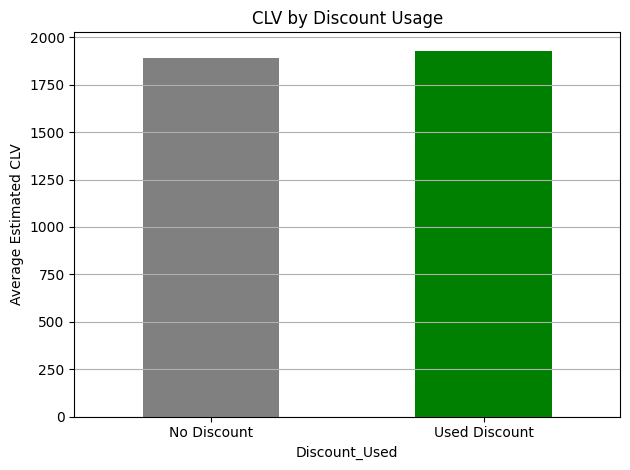

Discount_Used
False    1889.467244
True     1930.227562
Name: Estimated_CLV, dtype: float64


In [32]:
df['Estimated_CLV'] = df['Frequency_of_Purchase'] * df['Purchase_Amount']

clv_by_discount = df.groupby('Discount_Used')['Estimated_CLV'].mean()
clv_by_discount.plot(kind='bar', color=['gray', 'green'])
plt.xticks([0, 1], ['No Discount', 'Used Discount'], rotation=0)
plt.ylabel('Average Estimated CLV')
plt.title('CLV by Discount Usage')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

print(clv_by_discount)

The chart shows that customers who **used discounts have a slightly higher average CLV** (1930) compared to those who didn’t (1889). This suggests that discount strategies may help drive repeat purchases and spending, making them effective for boosting long-term customer value.

#Discount affecting purchase amount

In [33]:
df['Discount_Used'].value_counts()

,count
Discount_Used,
True,521
False,479


/tmp/ipython-input-34-1903821974.py:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-34-1903821974.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




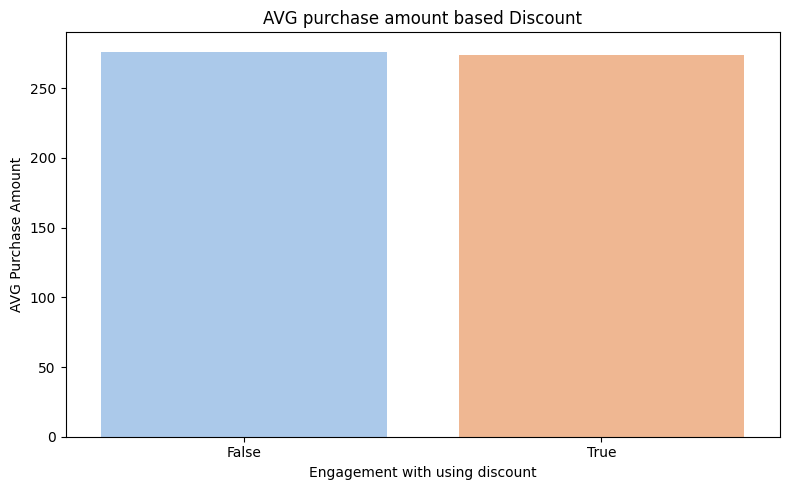

In [34]:
plt.figure(figsize=(8, 5))

sns.barplot(data=df, x='Discount_Used', y='Purchase_Amount', ci=None, palette='pastel')

plt.title('AVG purchase amount based Discount')
plt.xlabel('Engagement with using discount')
plt.ylabel('AVG Purchase Amount')
plt.tight_layout()
plt.show()

True = 521 customers used the discount

False = 479 customers did not use the discount
The use of discounts does not directly increase the average transaction value.

This indicates that customers who buy without discounts may be loyal segments or have high needs, so they continue shopping without waiting for discounts.

#Discount vs Loyalty

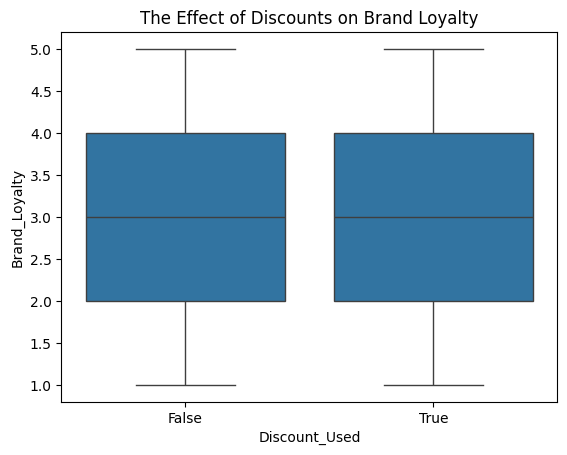

In [35]:
sns.boxplot(data=df, x='Discount_Used', y='Brand_Loyalty')
plt.title("The Effect of Discounts on Brand Loyalty")
plt.show()

he boxplot shows **no significant difference in brand loyalty between customers who used discounts and those who didn’t**. This suggests that offering discounts does not harm loyalty, making it a viable strategy for boosting purchases without risking customer retention.

# ADVERTISEMENT ANALYSIS

In [36]:
df['Engagement_with_Ads'].value_counts()

,count
Engagement_with_Ads,
High,526
Medium,244
Low,230


/tmp/ipython-input-37-2512303646.py:4: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/tmp/ipython-input-37-2512303646.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




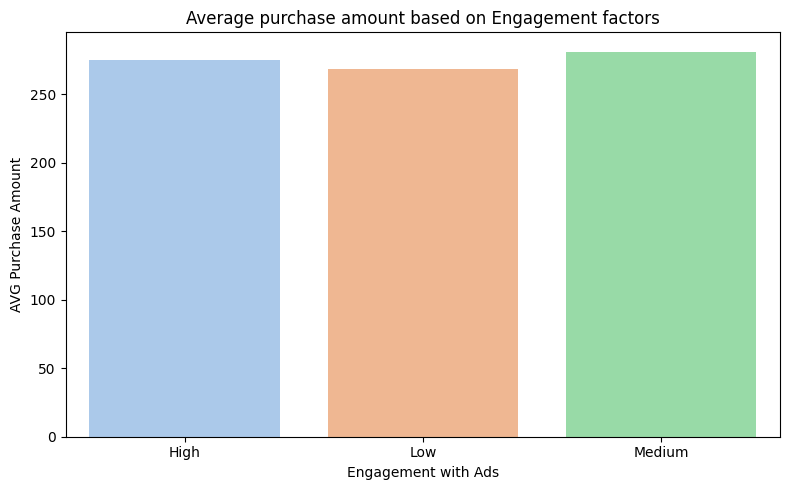

In [37]:
plt.figure(figsize=(8, 5))


sns.barplot(data=df, x='Engagement_with_Ads', y='Purchase_Amount', ci=None, palette='pastel')

plt.title('Average purchase amount based on Engagement factors')
plt.xlabel('Engagement with Ads')
plt.ylabel('AVG Purchase Amount')
plt.tight_layout()
plt.show()

The majority of customers (52.6%) have a high level of engagement with the ad, indicating that the campaign has succeeded in attracting attention. However, the other third are still at a medium to low level of engagement, which opens up opportunities for retargeting or more personalized content strategies.

#IV)CHANNEL & STRATEGY INSIGHTS

#Channel Preference Per Segment

/tmp/ipython-input-38-2050005593.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



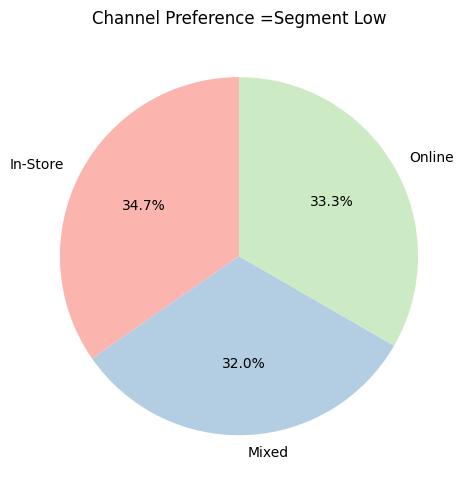

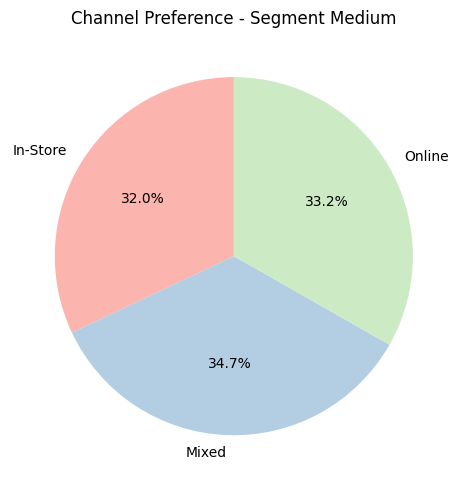

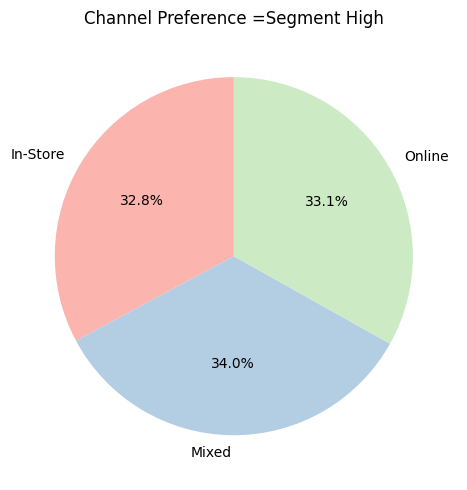

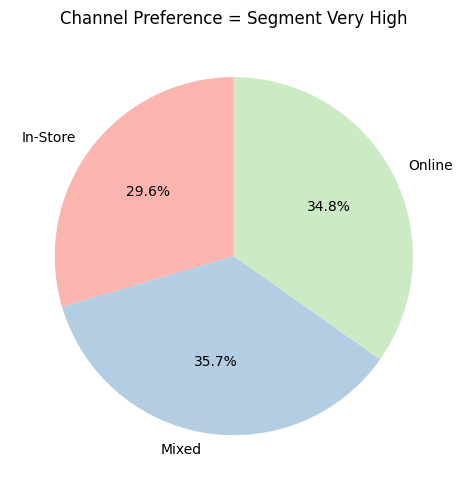

In [38]:
#segment data
channel_by_segment = df.groupby(['Segment', 'Purchase_Channel']).size().unstack()
#low
plt.figure(figsize=(5, 5))
channel_by_segment.loc['Low'].plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Channel Preference =Segment Low')
plt.ylabel('')
plt.tight_layout()
plt.show()

#Medium
plt.figure(figsize=(5, 5))
channel_by_segment.loc['Medium'].plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Channel Preference - Segment Medium')
plt.ylabel('')
plt.tight_layout()
plt.show()

#High
plt.figure(figsize=(5, 5))
channel_by_segment.loc['High'].plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Channel Preference =Segment High')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Very High
plt.figure(figsize=(5, 5))
channel_by_segment.loc['Very High'].plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Channel Preference = Segment Very High')
plt.ylabel('')
plt.tight_layout()
plt.show()

The goal is to understand channel preferences across different customer segments. The chart shows that **Medium and High segments have the highest transaction volumes across all channels**, especially in the **Mixed channel**. Even the **Very High** segment, though smaller in size, shows balanced usage of all three channels.

#Product favorite per Segment

/tmp/ipython-input-45-3874303285.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




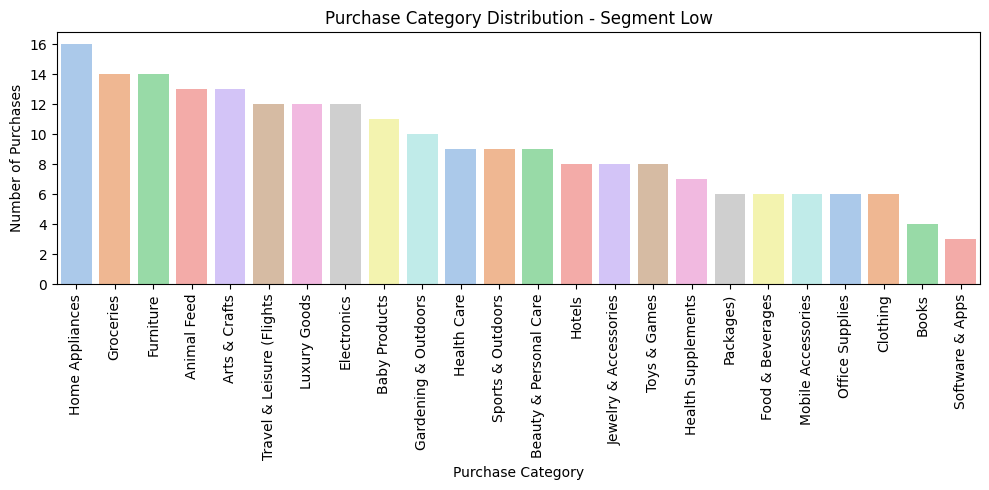

/tmp/ipython-input-45-3874303285.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




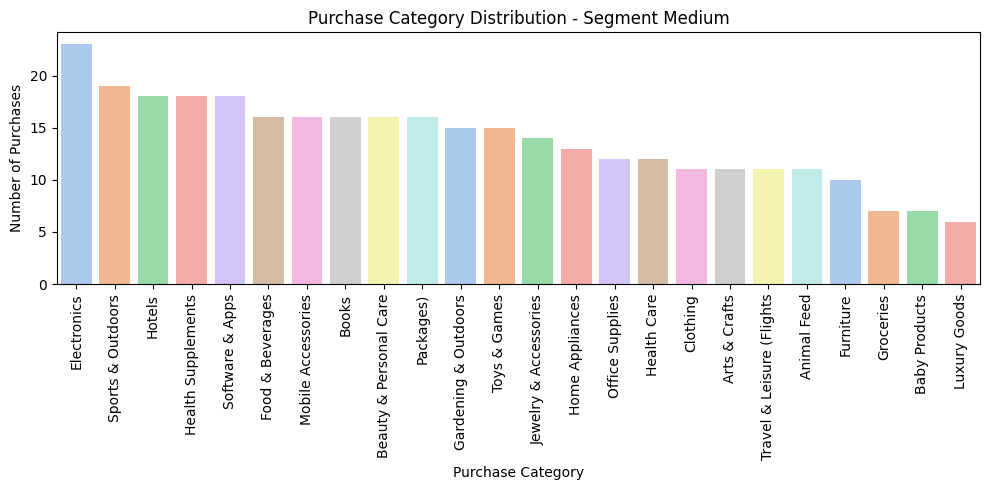

/tmp/ipython-input-45-3874303285.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




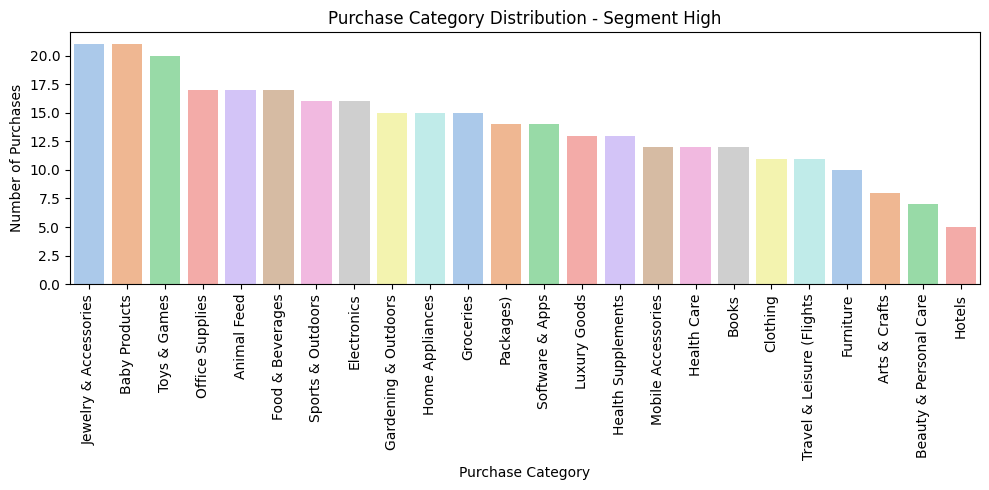

/tmp/ipython-input-45-3874303285.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




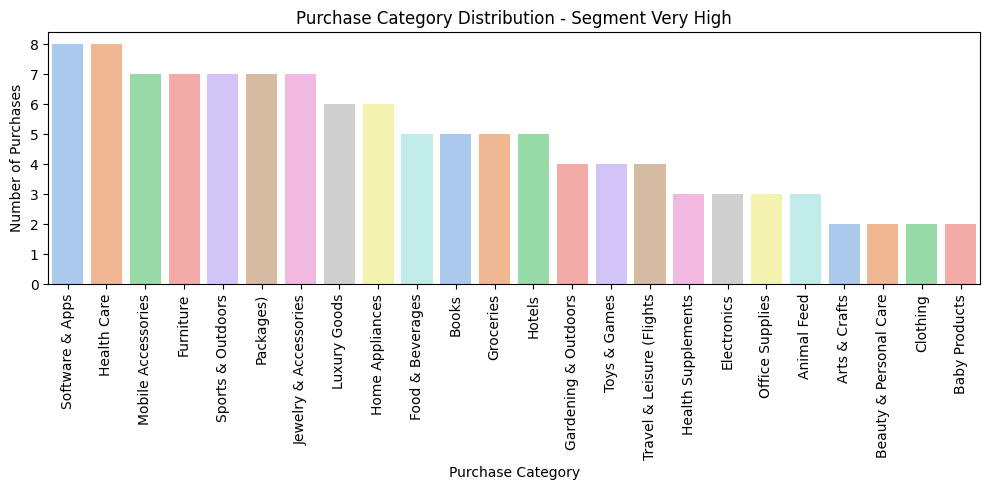

In [45]:
segments = ['Low', 'Medium', 'High', 'Very High']

for seg in segments:
    plt.figure(figsize=(10, 5))
    subset = df[df['Segment'] == seg]
    sns.countplot(data=subset, x='Purchase_Category', order=subset['Purchase_Category'].value_counts().index, palette='pastel')
    plt.title(f'Purchase Category Distribution - Segment {seg}')
    plt.xlabel('Purchase Category')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


#Cross Purchase analysis

In [39]:
mobile_buyers = df[df['Purchase_Category'] == 'Mobile Accessories']['Customer_ID'].unique()
elec_buyers = df[(df['Customer_ID'].isin(mobile_buyers)) & (df['Purchase_Category'] == 'Electronics')]

print(f"Customers who purchased Mobile Accessories: {len(mobile_buyers)}")
print(f"Of them, also purchased Electronics: {elec_buyers['Customer_ID'].nunique()}")

#NANTIK CEK LAGI GMN KL KE SEMUAAAA

Customers who purchased Mobile Accessories: 41
Of them, also purchased Electronics: 0


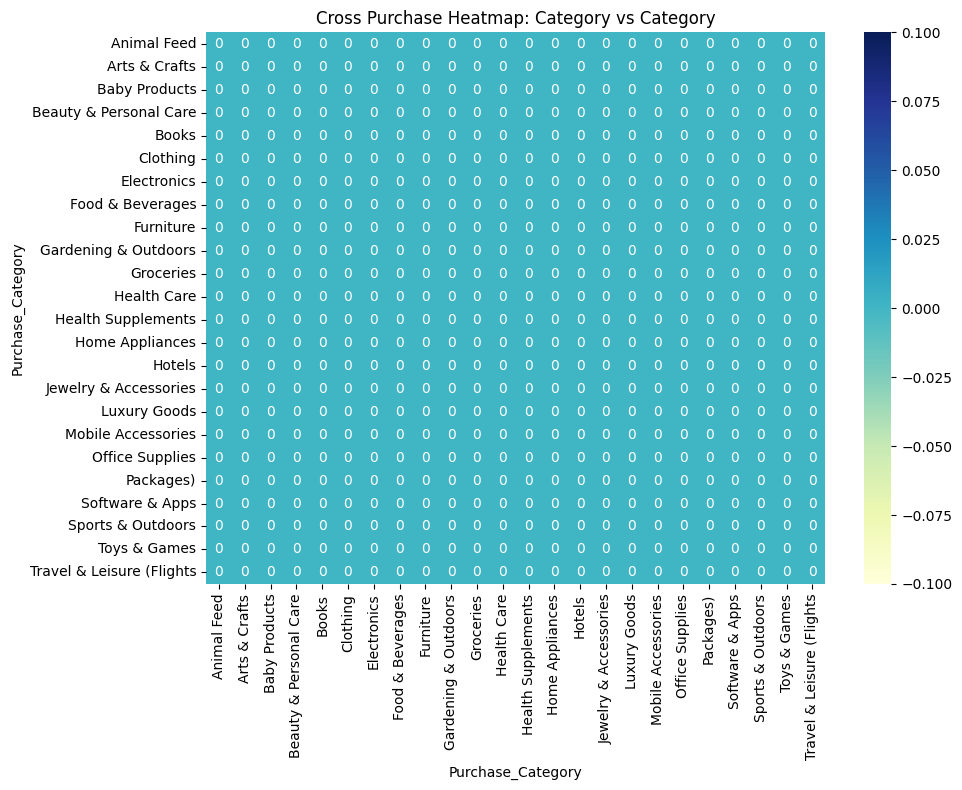

In [41]:

category_matrix = df.pivot_table(index='Customer_ID',
                                 columns='Purchase_Category',
                                 aggfunc='size',
                                 fill_value=0)


cross_purchase_matrix = category_matrix.T.dot(category_matrix)


np.fill_diagonal(cross_purchase_matrix.values, 0)

# Heatmap Cross Purchase
plt.figure(figsize=(10, 8))
sns.heatmap(cross_purchase_matrix, annot=True, fmt='g', cmap='YlGnBu')
plt.title("Cross Purchase Heatmap: Category vs Category")
plt.tight_layout()
plt.show()

Data hanya ada single purchase

#V) STRATEGIC INSIGHT

EXPORT DATA FOR DASHBOARD

In [40]:
df.to_csv('cleaned_segmented_data.csv', index=False)


from google.colab import files
files.download('cleaned_segmented_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>